In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline  
import matplotlib.pyplot as plt 



In [2]:
# type sklearn Bunch
iris_org = datasets.load_iris()
print(type(iris_org), '\n')
print(iris_org.keys(), '\n')
iris_d = pd.DataFrame(iris_org.data)
iris_t = pd.DataFrame(iris_org.target)

print(f"Shapes data: {iris_d.shape} and target: {iris_t.shape}.")
print(f"Columns data: {iris_d.columns.values} and target: {iris_t.columns.values}.")
iris = iris_d.join(iris_t, rsuffix='class')

iris_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
iris_species = iris_org.target_names
iris.columns = iris_features

<class 'sklearn.utils.Bunch'> 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

Shapes data: (150, 4) and target: (150, 1).
Columns data: [0 1 2 3] and target: [0].


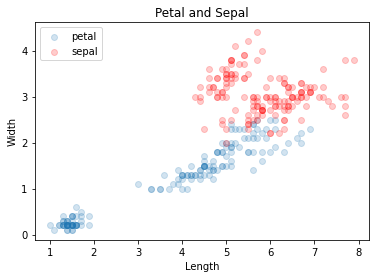

In [3]:

# alpha changes the transparency
plt.scatter(iris.petal_length, iris.petal_width, alpha=0.2, label='petal')
scatter = plt.scatter(iris.sepal_length, iris.sepal_width, alpha=0.2, 
                      color='red', label='sepal')

#Adding the aesthetics
plt.title('Petal and Sepal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

#Show the plot
plt.show()

## Sepal by class in one plot

In [4]:
colors = {0:'red', 1:'blue', 2:'green'}

NameError: name 'names' is not defined

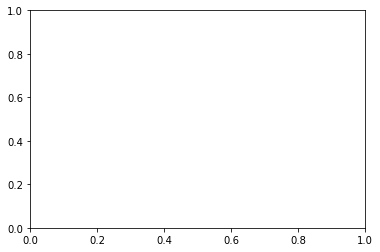

In [5]:
# create a figure and axis
fig, ax = plt.subplots()

# plot each color
for i in range(len(names)):
    ax.scatter(iris[iris.iris_class == i].sepal_length, 
               iris[iris.iris_class == i].sepal_width, 
               color = colors[i], label = iris_species[i])

# set a title and labels
ax.set_title('Iris Dataset - Sepal')
ax.set_xlabel('Length')
ax.set_ylabel('Width')

ax.legend()
plt.show()

## Sepal and Petal by class

In [ ]:
# create a figure and axis
figs, axes = plt.subplots(1, 2, figsize=(15,5))
a = [[0,1],[2,3]]
feats = ['Sepals', 'Petals']
count = 0
for ax in axes:
    # plot each color
    for i in range(len(names)):
        ax.scatter(iris[iris.iris_class == i][iris.columns[a[count][0]]], 
                   iris[iris.iris_class == i][iris.columns[a[count][1]]],
                   color = colors[i], label = names[i], alpha=0.5)
     
    # set a title and labels
    ax.set_title('Iris Dataset - '+ feats[count])
    ax.set_xlabel('Length')
    ax.set_ylabel('Width')
    ax.legend()    
    count += 1
plt.show()

# Housing

In [ ]:
housing = pd.read_csv('housing.csv')
housing.hist(bins=50, figsize=(20,15)) 
plt.show() 
# a histogram for each numerical attribute - initial overview
# What is missing? (skala?)

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing["income_cat"] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

## Stratified Split based on income

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]):
        strat_train_set = housing.loc[train_index]
        strat_test_set = housing.loc[test_index]
        
test_vals = strat_test_set["income_cat"].value_counts() / len(strat_test_set)
test_vals

In [ ]:
strat_train_set["income_cat"].hist()
strat_test_set["income_cat"].hist()
plt.show()

##### Samma fördelning!

# Titanic

In [ ]:
titanicT = pd.read_csv('titanic_train.csv')

In [ ]:
titanicT.head()

### What can we drop already?

In [ ]:
titanicT.columns

In [ ]:
x = titanicT.Age
y = titanicT.
f, ax = plt.subplots()
im = ax.imshow(pd.DataFrame([y,x]))

In [ ]:
ti_co = titanicT.corr()
ti_co

In [ ]:
# Titanic corelation heatmap
#excluding NA/null values.
f, ax = plt.subplots(figsize =(6, 5))
im = ax.imshow(ti_co)

ax.set_xticks(np.arange(len(ti_co.columns)), labels=ti_co.columns.values)
ax.set_yticks(np.arange(len(ti_co.columns)), labels=ti_co.columns.values)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_title("Correlation for titanic data")
fig.tight_layout()
plt.show()

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(ti_co.corr(),annot=True)